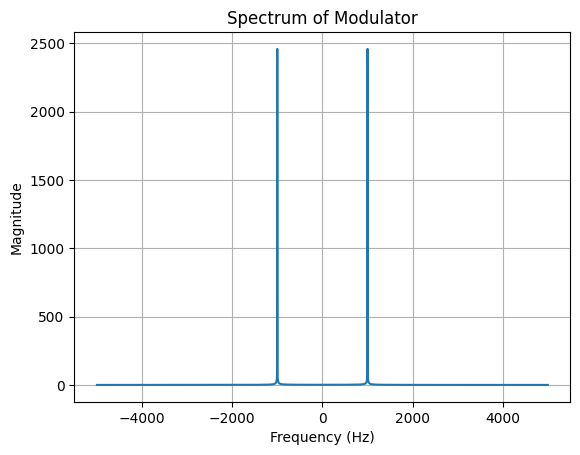

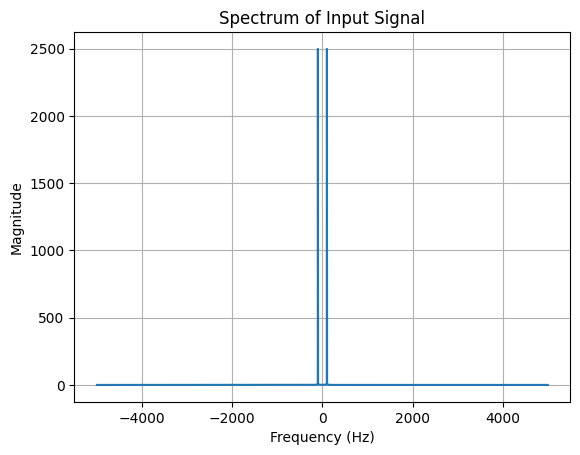

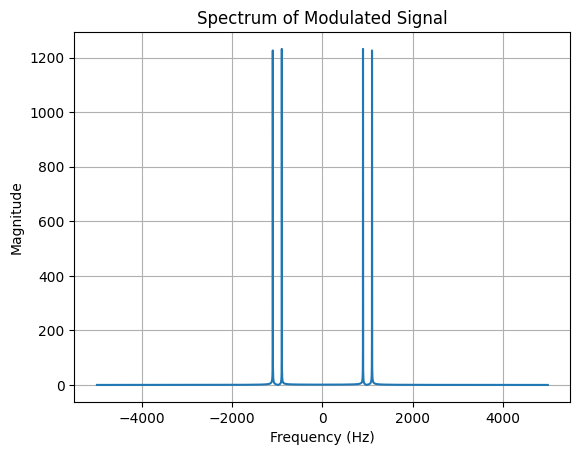

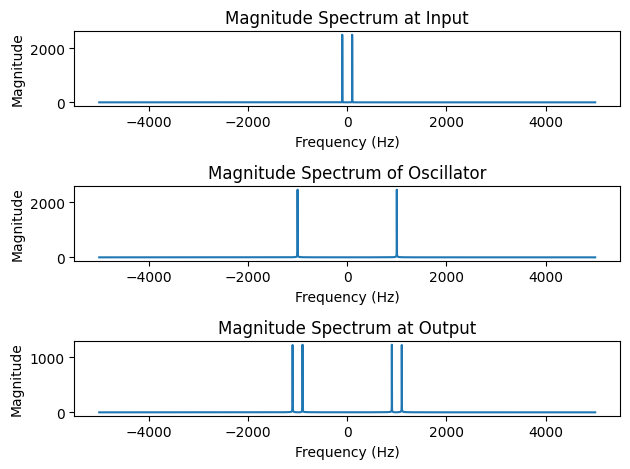

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular e plotar o espectro
def plotspec(signal, Ts):
    N = len(signal)  # Número de amostras
    freq = np.fft.fftshift(np.fft.fftfreq(N, Ts))  # Vetor de frequências
    spectrum = np.fft.fftshift(np.fft.fft(signal))  # FFT com centragem em zero
    plt.plot(freq, np.abs(spectrum))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()

# Parâmetros do sinal
time = 0.5  # tempo total
Ts = 1 / 10000  # intervalo de amostragem
t = np.arange(Ts, time, Ts)  # vetor de tempo
fc = 1000  # frequência do cosseno modulador
cmod = np.cos(2 * np.pi * fc * t)  # cosseno do modulador
fi = 100  # frequência do sinal de entrada
x = np.cos(2 * np.pi * fi * t)  # sinal de entrada
y = cmod * x  # multiplicação do sinal de entrada pelo modulador

# Plotar espectros
plt.figure(1)
plotspec(cmod, Ts)
plt.title('Spectrum of Modulator')

plt.figure(2)
plotspec(x, Ts)
plt.title('Spectrum of Input Signal')

plt.figure(3)
plotspec(y, Ts)
plt.title('Spectrum of Modulated Signal')

# Criar o gráfico final (espectros separados)
N = len(x)  # comprimento do sinal
ssf = np.fft.fftshift(np.fft.fftfreq(N, Ts))  # vetor de frequências centrado
fx = np.fft.fftshift(np.fft.fft(x))  # FFT do sinal de entrada
fcmod = np.fft.fftshift(np.fft.fft(cmod))  # FFT do modulador
fy = np.fft.fftshift(np.fft.fft(y))  # FFT do sinal modulado

plt.figure(4)
plt.subplot(3, 1, 1)
plt.plot(ssf, np.abs(fx))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum at Input')

plt.subplot(3, 1, 2)
plt.plot(ssf, np.abs(fcmod))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum of Oscillator')

plt.subplot(3, 1, 3)
plt.plot(ssf, np.abs(fy))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum at Output')

plt.tight_layout()
plt.show()
